In [1]:
# Problem Definition

In [2]:
# Import all packages needed
import pandas as pd, gc
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [3]:
df_train = pd.read_csv("property24_train2.csv")
df_test = pd.read_csv("property24_test2.csv")
df_train.head()

,id,location,bathrooms,bedrooms,parking,size,agent,price
0,1,Constantia,3.0,5.0,4.0,2000.0,Seeff Southern Suburbs,13250000
1,2,Silvertree Estate,4.0,5.0,4.0,603.0,Stonehurst Properties,10495000
2,3,Rondebosch,3.0,5.0,2.0,936.0,Seeff Southern Suburbs,8700000
3,4,Constantia,5.0,7.0,8.0,2032.0,Seeff Southern Suburbs,11500000
4,5,Llandudno,4.0,4.0,4.0,991.0,Seeff Hout Bay and Llandudno,19800000


In [4]:
# Drop irrelevant columns
train = df_train.drop(['id'], axis=1)
test = df_test.drop(['id'], axis=1)
train.head()

,location,bathrooms,bedrooms,parking,size,agent,price
0,Constantia,3.0,5.0,4.0,2000.0,Seeff Southern Suburbs,13250000
1,Silvertree Estate,4.0,5.0,4.0,603.0,Stonehurst Properties,10495000
2,Rondebosch,3.0,5.0,2.0,936.0,Seeff Southern Suburbs,8700000
3,Constantia,5.0,7.0,8.0,2032.0,Seeff Southern Suburbs,11500000
4,Llandudno,4.0,4.0,4.0,991.0,Seeff Hout Bay and Llandudno,19800000


In [5]:
# Check column data types
train.dtypes

location      object
bathrooms    float64
bedrooms     float64
parking      float64
size         float64
agent         object
price         object
dtype: object

In [6]:
test.dtypes

location      object
bathrooms    float64
bedrooms     float64
parking      float64
size         float64
agent         object
price         object
dtype: object

In [7]:
# Function to assist in converting categorical columns to numerical representation
# LABEL ENCODE
def encode_LE(train,test,cols,verbose=True):
    for col in cols:
        df_comb = pd.concat([train[col],test[col]],axis=0)
        df_comb,_ = df_comb.factorize(sort=True)
        nm = col
        if df_comb.max()>32000: 
            train[nm] = df_comb[:len(train)].astype('int32')
            test[nm] = df_comb[len(train):].astype('int32')
        else:
            train[nm] = df_comb[:len(train)].astype('int16')
            test[nm] = df_comb[len(train):].astype('int16')
        del df_comb; x=gc.collect()
        if verbose: print(nm,', ',end='')

In [8]:
encode_LE(train, test, ['location', 'agent'])
train.head()

location , agent , 

,location,bathrooms,bedrooms,parking,size,agent,price
0,26,3.0,5.0,4.0,2000.0,192,13250000
1,110,4.0,5.0,4.0,603.0,204,10495000
2,100,3.0,5.0,2.0,936.0,192,8700000
3,26,5.0,7.0,8.0,2032.0,192,11500000
4,66,4.0,4.0,4.0,991.0,189,19800000


In [9]:
# Check column data types
train.dtypes

location       int16
bathrooms    float64
bedrooms     float64
parking      float64
size         float64
agent          int16
price         object
dtype: object

In [10]:
test.dtypes

location       int16
bathrooms    float64
bedrooms     float64
parking      float64
size         float64
agent          int16
price         object
dtype: object

In [11]:
# remove POA values from price
train = train[train['price'].map(lambda x: x!='POA')]
test = test[test['price'].map(lambda x: x!='POA')]
train.dtypes

location       int16
bathrooms    float64
bedrooms     float64
parking      float64
size         float64
agent          int16
price         object
dtype: object

In [12]:
# Convert price to int
train['price'] = train['price'].astype('int16')
test['price'] = test['price'].astype('int16')
train.dtypes

location       int16
bathrooms    float64
bedrooms     float64
parking      float64
size         float64
agent          int16
price          int16
dtype: object

In [13]:
test.dtypes

location       int16
bathrooms    float64
bedrooms     float64
parking      float64
size         float64
agent          int16
price          int16
dtype: object

In [14]:
# Finding Null values
train.isnull().sum()

location       0
bathrooms     24
bedrooms      20
parking      295
size         203
agent          0
price          0
dtype: int64

In [15]:
test.isnull().sum()

location       0
bathrooms     14
bedrooms      20
parking      177
size         134
agent          0
price          0
dtype: int64

In [16]:
#Filling null values with mean of relevant column for both train and test
train.fillna(round(train['bathrooms'].mean()), inplace=True)
train.fillna(round(train['bedrooms'].mean()), inplace=True)
train.fillna(round(train['parking'].mean()), inplace=True)
train.fillna(round(train['size'].mean()), inplace=True)
train.fillna(round(train['agent'].mean()), inplace=True)

test.fillna(round(train['bathrooms'].mean()),inplace=True)
test.fillna(round(train['bedrooms'].mean()),inplace=True)
test.fillna(round(train['parking'].mean()),inplace=True)
test.fillna(round(train['size'].mean()),inplace=True)
test.fillna(round(train['agent'].mean()),inplace=True)

In [17]:
train.isnull().sum()

location     0
bathrooms    0
bedrooms     0
parking      0
size         0
agent        0
price        0
dtype: int64

In [18]:
test.isnull().sum()

location     0
bathrooms    0
bedrooms     0
parking      0
size         0
agent        0
price        0
dtype: int64

In [19]:
# Append train and test data
train = train.append(test, ignore_index = True)

In [20]:
train.shape

(3101, 7)

In [21]:
X = train.drop(['price'], axis=1)  #independent columns
y = train["price"] #target column i.e price range

In [22]:
SEED = 222
from sklearn.model_selection import train_test_split
# split into train-test sets
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=SEED)

In [23]:
# remove negative values
X['agent'] = X['agent'].apply(lambda x: 1 if x < 0 else x)
test['agent'] = test['agent'].apply(lambda x: 1 if x < 0 else x)

In [24]:
# 1. UNIVARIATE SELECTION

#apply SelectKBest class to extract top 5 best features
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(5,'Score'))  #print 10 best features

       Specs         Score
4       size  1.265028e+11
0   location  2.889753e+04
5      agent  2.450772e+04
3    parking  2.529836e+03
1  bathrooms  2.135385e+03


In [25]:
# 2. FEATURE IMPORTANCE
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

print(model.feature_importances_)

/Users/isaac/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.17471395 0.10560614 0.0995281  0.13876688 0.27511914 0.20626579]


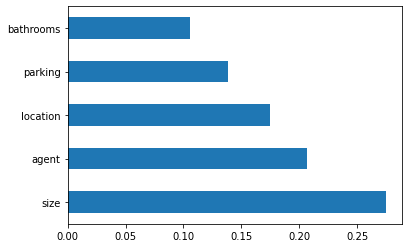

In [26]:
#use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

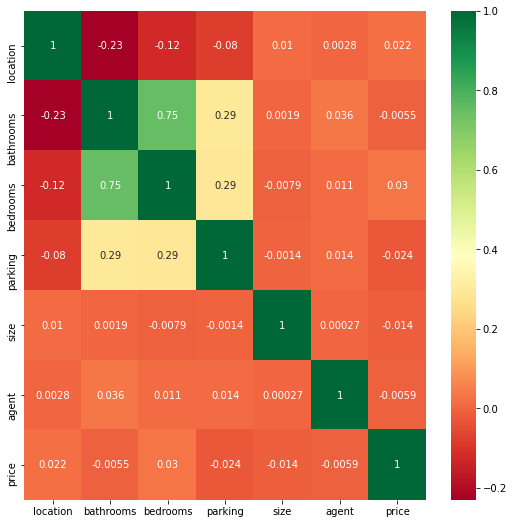

In [27]:
# 3. Correlation Matrix with Heatmap
# Correlation states how the features are related to each other or the target variable.
import seaborn as sns

#get correlations of each features in dataset
corrmat = train.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(9,9))

#plot heat map
g=sns.heatmap(train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [28]:
SEED = 222
from sklearn.model_selection import train_test_split
# split into train-test sets
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=SEED)

In [29]:
# A host of Scikit-learn models
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.kernel_approximation import Nystroem
from sklearn.kernel_approximation import RBFSampler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_auc_score

def get_models():
    """Generate a library of base learners."""
    nb = GaussianNB()
    svc = SVC(C=100, probability=True)
    knn = KNeighborsClassifier(n_neighbors=3)
    lr = LogisticRegression(C=100, random_state=SEED)
    nn = MLPClassifier((80, 10), early_stopping=False, random_state=SEED)
    rf = RandomForestClassifier(n_estimators=10, max_features=3, random_state=SEED)
    cb = CatBoostClassifier(n_estimators=20)

    models = {'svm': svc,
              'knn': knn,
              'naive bayes': nb,
              'mlp-nn': nn,
              'random forest': rf,
              'logistic': lr,
              'catboost': cb
              }

    return models


def train_predict(model_list):
    """Fit models in list on training set and return preds"""
    P = np.zeros((ytest.shape[0], len(model_list)))
    P = pd.DataFrame(P)

    print("Fitting models.")
    cols = list()
    for i, (name, m) in enumerate(models.items()):
        print("%s..." % name, end=" ", flush=False)
        m.fit(xtrain, ytrain)
        P.iloc[:, i] = m.predict(xtest)
        cols.append(name)
        print("done")

    P.columns = cols
    print("Done.\n")
    return P


def score_models(P, y):
    """Score model in prediction DF"""
    print("Scoring models.")
    for m in P.columns:
        score = roc_auc_score(y, P.loc[:, m])
        print("%-26s: %.3f" % (m, score))
    print("Done.\n")

In [30]:
models = get_models()
P = train_predict(models)

Fitting models.
svm... 

/Users/isaac/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


done
knn... done
naive bayes... done
mlp-nn... 

/Users/isaac/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


done
random forest... done
logistic... 

/Users/isaac/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/isaac/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/isaac/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


done
catboost... Learning rate set to 0.5
0:	learn: 6.2337091	total: 5.6s	remaining: 1m 46s
1:	learn: 5.9890320	total: 10.3s	remaining: 1m 33s
2:	learn: 5.7882084	total: 15.6s	remaining: 1m 28s
3:	learn: 5.5981689	total: 21.2s	remaining: 1m 24s
4:	learn: 5.4143489	total: 25.9s	remaining: 1m 17s
5:	learn: 5.2332735	total: 31.5s	remaining: 1m 13s
6:	learn: 5.0816996	total: 38.8s	remaining: 1m 12s
7:	learn: 4.9357325	total: 45.4s	remaining: 1m 8s
8:	learn: 4.8015547	total: 51.1s	remaining: 1m 2s
9:	learn: 4.6941767	total: 56.4s	remaining: 56.4s
10:	learn: 4.5915888	total: 1m 2s	remaining: 50.9s
11:	learn: 4.4763419	total: 1m 8s	remaining: 45.9s
12:	learn: 4.3607610	total: 1m 14s	remaining: 40.1s
13:	learn: 4.2566972	total: 1m 20s	remaining: 34.5s
14:	learn: 4.1747830	total: 1m 25s	remaining: 28.5s
15:	learn: 4.0906146	total: 1m 30s	remaining: 22.7s
16:	learn: 4.0201448	total: 1m 35s	remaining: 16.9s
17:	learn: 3.9260054	total: 1m 41s	remaining: 11.3s
18:	learn: 3.8367567	total: 1m 46s	rem

In [31]:
P

,svm,knn,naive bayes,mlp-nn,random forest,logistic,catboost
0,-3936,-29752,31600,-21984,-3936,31224,28896
1,-19656,8800,21024,21024,29920,-12352,29920
2,-19656,-1088,28920,-26800,-29752,-19656,-26256
3,-19656,-32160,3608,-28432,-32160,-6568,-7872
4,3184,-6864,3608,-25120,3184,20144,-20488
...,...,...,...,...,...,...,...
771,-19656,-17376,-26960,-20544,-32448,-26960,-26960
772,-19656,-26984,11600,-26984,-18048,-10592,-30736
773,-19656,-24704,-11749,26592,-6864,-30376,14264
774,28896,-15200,-29288,-21984,-25912,31224,8208


In [34]:
# Average difference in prediction
print(f"Score for SVM: {abs(test['price'].mean() - P['svm'].mean())}")
print(f"Score for knn: {abs(test['price'].mean() - P['knn'].mean())}")
print(f"Score for naic: {abs(test['price'].mean() - P['naive bayes'].mean())}")
print(f"Score for ml: {abs(test['price'].mean() - P['mlp-nn'].mean())}")
print(f"Score for rf: {abs(test['price'].mean() - P['random forest'].mean())}")
print(f"Score for logistic: {abs(test['price'].mean() - P['logistic'].mean())}")
print(f"Score for catboost: {abs(test['price'].mean() - P['catboost'].mean())}")

Score for SVM: 15406.335083365151
Score for SVM: 13484.56446480845
Score for SVM: 2095.8633702430952
Score for SVM: 7972.863370243096
Score for SVM: 4711.786114292987
Score for SVM: 1508.899516354843
Score for SVM: 215.1108565610284


In [35]:
# Ensemble of all
print(f"Score for ensemble: {abs(test['price'].mean() - P.mean())}")

Score for ensemble: svm              15406.335083
knn              13484.564465
naive bayes       2095.863370
mlp-nn            7972.863370
random forest     4711.786114
logistic          1508.899516
catboost           215.110857
dtype: float64
